Before beginning, download the dataset from https://www.kaggle.com/CooperUnion/anime-recommendations-database and place it inside datasets folder.

In [2]:
from load_modules import load_modules
load_modules()
from helpers.dataset import Dataset

d = Dataset('anime-recommendations-database')

We will first date a look at the anime data and what features are included in the dataset.

In [3]:
anime_data =  d.load_dataframe('anime.csv')
anime_data.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [4]:
for col in anime_data:
    print(col, anime_data[col].dtype)

anime_id int64
name object
genre object
type object
episodes object
rating float64
members int64


Now, we don't need the name, we want the genres and types as separate categorical variables, and we want episodes to be integer. That requires some unfortunate cleanup.

In [5]:
import pandas as pd
import numpy as np

In [6]:
genres = anime_data['genre'].str.replace(' ', '').str.get_dummies(sep = ',')

anime_features = pd.concat([anime_data['anime_id'], # anime ids
                  genres, # genres
                  pd.get_dummies(anime_data['type'], prefix = 'type'), # types
                  pd.to_numeric(anime_data['episodes'],  errors='coerce'), # num_episodes
                  anime_data['rating'], # avg ratings
                  anime_data['members'], # num_members
                  ], axis = 1)
anime_features.head()

,anime_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,episodes,rating,members
0,32281,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1.0,9.37,200630
1,5114,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,64.0,9.26,793665
2,28977,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,51.0,9.25,114262
3,9253,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,24.0,9.17,673572
4,9969,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,51.0,9.16,151266


Now, there can be null values in the dataset, so it is good to look at the portion of the dataset that is affected by this.

In [7]:
np.sum(anime_features.isnull().any(axis = 1))/anime_features.shape[0]

0.034000325361965185

Only 3%, meaning we can simply ignore them for now.

In [8]:
anime_features = anime_features.dropna()

The `describe` method of a DataFrame gives us a very easy look into the statistics behind each of our features.

In [9]:
anime_features.describe()

,anime_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,episodes,rating,members
count,11876.000000,11876.000000,11876.000000,11876.000000,11876.000000,11876.000000,11876.000000,11876.000000,11876.000000,11876.000000,...,11876.000000,11876.000000,11876.000000,11876.000000,11876.000000,11876.000000,11876.000000,11876.000000,11876.000000,1.187600e+04
mean,13470.844055,0.231391,0.193078,0.005978,0.377484,0.020040,0.024166,0.166049,0.052796,0.186847,...,0.003452,0.193331,0.041007,0.051364,0.273409,0.140283,0.300606,12.447289,6.480333,1.844146e+04
std,11140.893582,0.421739,0.394731,0.077092,0.484778,0.140144,0.153572,0.372140,0.223635,0.389805,...,0.058658,0.394927,0.198315,0.220749,0.445728,0.347295,0.458541,47.011062,1.021995,5.527548e+04
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.670000,1.200000e+01
25%,3351.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.890000,2.290000e+02
50%,9867.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.570000,1.572500e+03
75%,23407.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,12.000000,7.182500,9.766250e+03
max,34519.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1818.000000,10.000000,1.013917e+06


Through a simple glance, we can see that the mean rating is 6.47, far higher than the theoretical 5. Let's look at how the rating changes with different categories.

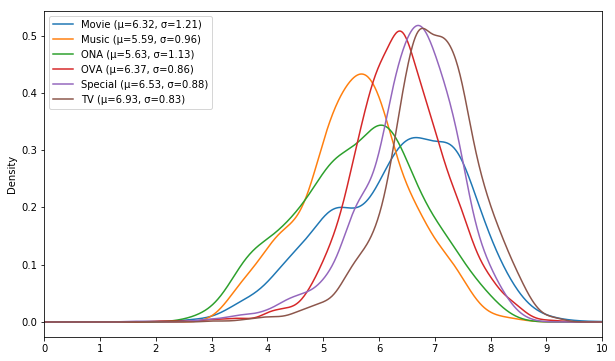

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

categories = ['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']
means = [anime_features[anime_features['type_' + category] == 1]['rating'].mean() for category in categories]
stds = [anime_features[anime_features['type_' + category] == 1]['rating'].std() for category in categories]
ax = None
for category in categories:
    ax = anime_features[anime_features['type_' + category] == 1]['rating'].plot(ax = ax,
        kind = 'density', figsize = (10, 6), use_index = True, legend = True, xlim = (0, 10), xticks = np.arange(11))

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, ['{0} (μ={1:.2f}, σ={2:.2f})'.format(category, mean, std) for category, mean, std in zip(categories, means, stds)], loc='best') 

Surprising to me, the TV series are the highest performers (I would've guessed movies). I myself usually give a worse rating to movies that come after successful TV shows, so that might be a reason, but we can't do such a comparison with our dataset, without anime relations. The standard deviation of the movies is also a lot higher, as should be evident by the 

Coming back to our statistics, we see that the mean number of episodes is 12, but that is probably highly dependant on which category that anime belongs to. It can also be useful to look at the # of episodes per genre, so let's do both.

In [11]:
print('Categories')
for category in categories:
    mean = anime_features[anime_features['type_' + category] == 1]['episodes'].mean()
    median = anime_features[anime_features['type_' + category] == 1]['episodes'].median()
    print('{0}: mean={1:.2f}, median={2:.0f}'.format(category, mean, median))
print('\nGenres')
for genre in genres.columns:
    mean = anime_features[anime_features[genre] == 1]['episodes'].mean()
    median = anime_features[anime_features[genre] == 1]['episodes'].median()
    print('{0}: mean={1:.2f}, median={2:.0f}'.format(genre, mean, median))

Categories
Movie: mean=1.10, median=1
Music: mean=1.13, median=1
ONA: mean=6.86, median=2
OVA: mean=2.42, median=2
Special: mean=2.57, median=1
TV: mean=35.97, median=24

Genres
Action: mean=13.25, median=3
Adventure: mean=17.57, median=3
Cars: mean=18.37, median=4
Comedy: mean=17.26, median=4
Dementia: mean=1.96, median=1
Demons: mean=10.81, median=3
Drama: mean=10.84, median=2
Ecchi: mean=7.70, median=5
Fantasy: mean=13.64, median=2
Game: mean=22.49, median=13
Harem: mean=9.04, median=12
Hentai: mean=2.16, median=2
Historical: mean=18.17, median=1
Horror: mean=8.88, median=3
Josei: mean=9.83, median=10
Kids: mean=18.53, median=1
Magic: mean=17.62, median=6
MartialArts: mean=17.11, median=3
Mecha: mean=14.79, median=4
Military: mean=9.66, median=2
Music: mean=4.22, median=1
Mystery: mean=10.85, median=3
Parody: mean=12.16, median=3
Police: mean=9.55, median=1
Psychological: mean=8.50, median=3
Romance: mean=11.51, median=4
Samurai: mean=10.73, median=2
School: mean=12.65, median=7
Sci

The categories are pretty much as expected, though I'm not sure about how there is more than 1 episode per movie. The genres are more spread-out, but it is obvious that the defining factor in the number of episodes is the combination of both. Doing that analysis would spread some genres too thin, so for now I am avoiding it.

Instead, I want to take a look at how the number of episodes are spread. Generally speaking, there are multiple ways an anime can be distributed:
* Seasonal TV, where an anime may have 12-13 episodes per season (per cour, as it is called), for however long it rungs (generally 1 or 2)
* Long running TV, where the anime does not really end until the source material ends or it is no longer profitable (think 300+ episodes)
* Hard copy disks (OVAs), where its usually 2-3 or 5-6 episodes per anime.
* One-offs, with 1 episode per anime.

Keeping these in mind, I wanted to look at the probability density of the episode counts.

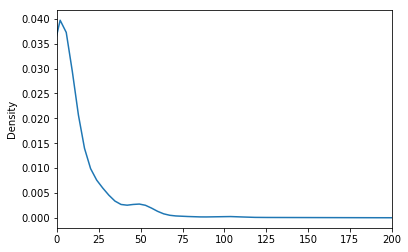

In [12]:
anime_features['episodes'].plot(kind = 'density', xlim = (0, 200))

This figure shows clearly that the probability peaks at around 1, then decreases logarithmically until the 30s, where it increases to an unexpected bump at around 50, before falling again. The 50 episode mark probably has to do with year-long (4-cour) anime. This does not, however, show the different nuances between close number of episodes, and for that, we need to plot a histogram.

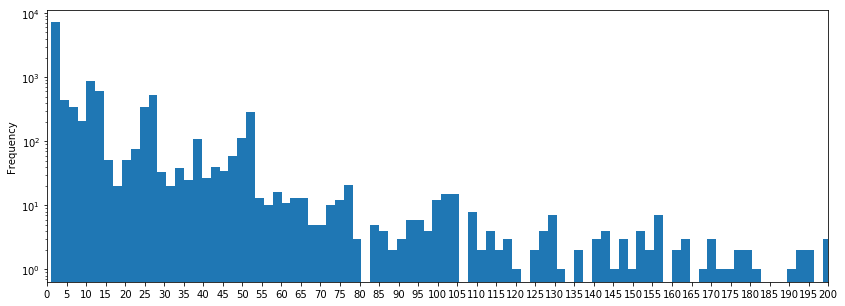

In [13]:
anime_features['episodes'].plot(
    kind = 'hist', xlim = (0, 200), bins = 800, logy = True, xticks = np.arange(0, 2000, 5), figsize = (14, 5))

Here, we can clearly see the peaks around 11-13 episodes and 24-26 episodes, marking the 1-cour and 2-cour anime. A similar but smaller peak is around 36-38 episode mark, and the last high peak is the 52 episode mark. Note that this is a logarithmic plot, made so that we can clearly see the peaks, but the actual difference between the peaks and its surroundings are much higher (erase the `logy = True` argument from the above line to see the original).

Given this information, I wanted to try clustering these anime by their episode counts, to see if I can find some cluster centers that fit it. I used K-Means to cluster the episode counts, and re-ran it 10 times to make sure my results were not affected by bad initialization (which K-Means is prone to).

In [14]:
from sklearn.cluster import MiniBatchKMeans

n_trials = 10
n_clusters = 5
print(' '*n_clusters*3 + 'Centers' + ' '*5 + ' '*n_clusters*5 + 'Counts')
for i in range(n_trials):
    kmeans = MiniBatchKMeans(n_clusters = n_clusters).fit(anime_features['episodes'].values.reshape(-1, 1))
    cstr = ['{0:>6.1f}'.format(c[0]) for c in kmeans.cluster_centers_]
    nstr = ['{0:5}'.format(n) for n in np.bincount(kmeans.labels_)]
    print(' '.join(cstr) + '     ' + ' '.join(nstr))

               Centers                              Counts
   1.7  153.6   51.1   17.2  879.0      8076   137   899  2752    12
   3.4  939.5  172.0   25.7   54.3      9675    11   107  1323   760
   3.7  434.8   50.5   25.6  122.0      9675    30   790  1218   163
   3.5  115.9   51.2   24.8  514.2      9675   179   783  1218    21
   5.3 1546.0  153.8   53.1  374.8     10764     8   113   968    23
   3.5   48.8  144.9   54.8   25.2      9675   501   169   350  1181
  17.1   48.9   51.0    1.8  120.2      2741   354   509  8076   196
 264.9    1.6   52.1   25.7   12.0        68  7905   915  1151  1837
  55.8    1.6   26.5  194.3   12.0       763  7905  1260   107  1841
   5.2    1.2   45.4   98.7   26.0      2504  7192   787   244  1149


It is evident that one of the cluster centers tend to 1, as many clusters do contain a value near 1-2, with a high number of anime fitting into that cluster. There also are cluster centers in the 10s and 20s with sizeable chunks of anime, though it seems that some of the anime belonging to those groups get swallowed up by other cluster centers higher up. The effect of the 52 episode peak is also visible, as there are usually centers right around it. And speaking of higher ups, there obviously is a cluster center that represents a large region of episodes, representing the long-running shows.

Having done that, we can look to see if we have biases/correlations in the dataset with respect to different features. It is not the same as looking at the correlations of each feature to the rating, but we can do a very simple linear regression on this dataset and look at the different coefficients it gives for different features to get a crude idea.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

lr.fit(anime_features.drop('rating', axis = 1), anime_features['rating']).score(anime_features.drop('rating', axis = 1), anime_features['rating'])

0.38376392665721948

A lowly .38 for our $R^2$ value, but the coefficients will still give us some insight.

In [17]:
for name, coef in zip(anime_features.drop('rating', axis = 1).columns, lr.coef_):
    print(name, coef)

anime_id -1.20407335408e-05
Action 0.0791117352757
Adventure 0.105010277192
Cars -0.00760683275125
Comedy 0.111169881228
Dementia -0.926525177252
Demons -0.0554576091279
Drama 0.373457132837
Ecchi -0.122737881837
Fantasy 0.184946507526
Game 0.129961125107
Harem 0.0568622489149
Hentai 0.0619556475062
Historical 0.244094280211
Horror -0.220051468187
Josei 0.561181572763
Kids -0.101882887188
Magic 0.081064877769
MartialArts 0.0376868836973
Mecha -0.0209531727031
Military 0.306483568357
Music 0.121302438299
Mystery 0.382383591278
Parody 0.105348623333
Police 0.358273640285
Psychological 0.170196762235
Romance 0.106455201034
Samurai 0.0834452220595
School 0.269172816014
Sci-Fi 0.0826381559624
Seinen 0.280546746467
Shoujo 0.198926701821
ShoujoAi 0.15416395099
Shounen 0.363823487864
ShounenAi 0.207650853626
SliceofLife 0.222225163853
Space 0.054916701777
Sports 0.209158110312
SuperPower 0.0831981959986
Supernatural 0.189810533347
Thriller 0.165900629811
Vampire -0.0358883523718
Yaoi -0.113067

These results suggest that there is little correlation between the # of episodes and the # of members to the ratings, though there are some genres which have a significant impact on the outcome (ex: josei & dementia). I suspect these have more to do with the low # of anime of those genres. Let's find out, using the [Pearson Correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between the two variables. Note that we are looking at the absolute values of the coefficients, because we are concerned about how big the effect of any given genre is to the overall rating.

In [18]:
from scipy.stats import pearsonr

coefs = pd.DataFrame(
    lr.coef_.reshape(1, lr.coef_.shape[0]),
    columns = anime_features.drop('rating', axis = 1).columns
)
coefs

,anime_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,episodes,members
0,-0.000012,0.079112,0.10501,-0.007607,0.11117,-0.926525,-0.055458,0.373457,-0.122738,0.184947,...,-0.113067,-0.151914,0.081541,-0.324817,-0.397921,0.111467,0.24349,0.286238,0.000385,0.000005


In [19]:
pearsonr(
    anime_features[genres.columns].sum(axis = 0).values,
    np.abs(coefs[genres.columns].values).reshape(genres.columns.size)
)[0]

-0.10254324869761733

As expected, there is a (small) negative correlation between the effect of genres and the # of anime in those genres: as the audience gets bigger, and the viewers get more diverse, the average ratings decrease.

Now, let's look at the ratings.

In [20]:
user_data = d.load_dataframe('rating.csv')
user_data.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


These -1 ratings show that the user has added an anime to their list but has not (yet) rated it. Again, we can look at the how much of the ratings is missing.

In [21]:
(user_data['rating'] == -1).astype('int').sum() / user_data['rating'].astype('int').sum()

0.030755315731718854

Again, around 3%, which is an acceptable loss for us.

In [22]:
user_features = user_data[user_data['rating'] != -1]
user_features.size

19011723

We first look at the distribution of average ratings across all users, to get a grasp of how diverse the voter population is.

In [23]:
user_means = user_features.groupby('user_id')['rating'].mean()

In [24]:
user_means.describe()

count    69600.000000
mean         8.227761
std          0.902856
min          1.000000
25%          7.666667
50%          8.193548
75%          8.815789
max         10.000000
Name: rating, dtype: float64

The mean of the average ratings per user is very high, and the standard deviation is actually less than what I've imagined. 50% of the people lie within the 7.6 to 8.8 range, which makes me expect that predicting the ratings for that group of people will be much easier.

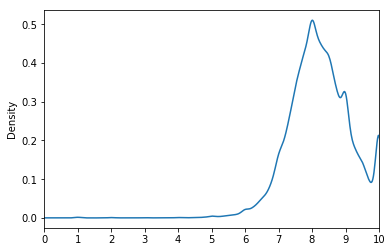

In [25]:
user_means.plot(kind = 'density', xlim = (0, 10), xticks = np.arange(11))

Perhaps unsurprisingly, the peak is not around the theoretical 5 value, but rather, around high 7s. I myself attribute this to users not even bothering to watch (and similarly, rate) shows that do not interest them. After all, why would you willingly expose yourself to a show you would not like? This is a common trend in recommender systems, except for those you cannot choose what you are exposed to.

One thing surprising for me is the high probability of raters rating only 10s. It is possible that some of these are bots, though I refrain any judgement before seeing the histogram.

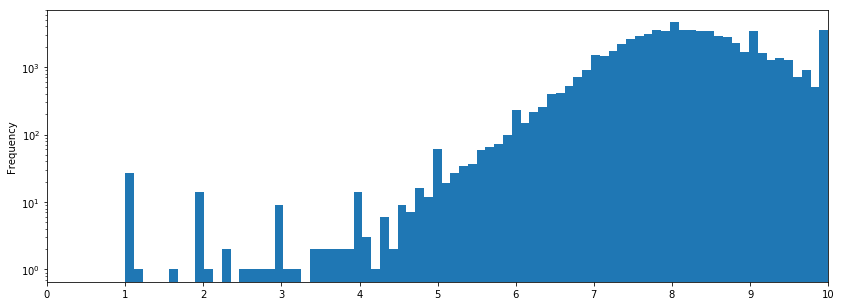

In [26]:
user_means.plot(
    kind = 'hist', xlim = (0, 10), bins = 80, logy = True, xticks = np.arange(11), figsize = (14, 5))

This histogram shows that there is a sizeable portion of raters that are only giving 10s, and that their effect is enough to bring the number of voters in the 9.125 to 10 rating interval, which would have been around mid 100s following the declining trend, to an order of magnitude higher.

We can also look at the distribution of the standard deviations of users, to see how diverse a range they rate in.

In [27]:
user_stds = user_features.groupby('user_id')['rating'].std().fillna(0)
user_stds.describe()

count    69600.000000
mean         1.173732
std          0.537164
min          0.000000
25%          0.935257
50%          1.195315
75%          1.467501
max          6.363961
Name: rating, dtype: float64

The `fillna(0)` part is necessary since pandas returns NaN for the std deviation of groups with only a single element (in our case, users with a single rating). The mean standard deviation is 1.17, which suggests that users usually vote 1 to 2 points around their mean. Again, this brings me back to my previous assessment that people don't usually bother watching content they would not presumably like. The minimum is 0, which is expected given the amount of people who rate all 10s and all 1s (see above graph). But how much does is skew the standard deviation distribution?

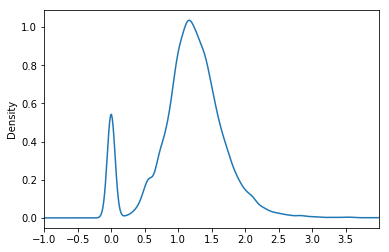

In [28]:
user_stds.plot(kind = 'density', xlim = (-1, 4), xticks = np.arange(-1, 4, .5))

This figure appears to be, apart from the small hiccup at 0.5, a near-perfect combination of two separate distributions; one centered around 1.1, other around 0, though it is likely that the second distribution is just an infinite vertical line at x = 0. What I'm interested in is how the rest of the standard deviations fare after removing the 0s. Though there probably are legit users with zero standard deviation, canif our aim was to predict ratings for a given user, I think we could make a special case for them and simply use their one and only ratings for the estimated rating for any anime they rate. This seems very reasonable, but in actuality, should not be the way to go for recommender systems.

Take, for example, an extremely cold-start user with 1 or 2 ratings, which are all the same. If we make all items equally likely to be recommended (because they would have the same rating due to our special case), we end up discarding valuable information about which genre of anime the user has watched first, and how much they've liked it. On the other hand, the anime a user first watches might not at all be indicative of their tastes, and the user might not realize this until after watching dozens of anime.

This will not be a problem for most of our users, however, so we might want to focus on them instead. Let's see how many users actually fall into this category, and how much of the ratings they constitute to.

In [29]:
print('Percentage users:', user_stds[user_stds == 0].shape[0] / user_stds.shape[0])
print('Percentage ratings:', user_features.groupby('user_id')['rating'].count()[user_stds == 0].sum() / user_features.shape[0])

Percentage users: 0.07867816091954023
Percentage ratings: 0.00512383859159


We can see that although the 0-deviation users are about 7.9% of our users, the amount of total ratings they have is .5%. 

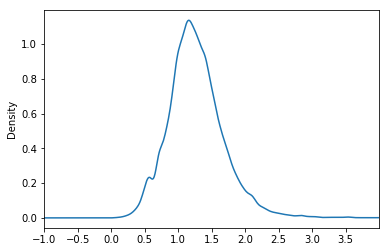

In [30]:
user_features.groupby('user_id')['rating'].std().where(lambda x: x != 0).plot(kind = 'density', xlim = (-1, 4), xticks = np.arange(-1, 4, .5))

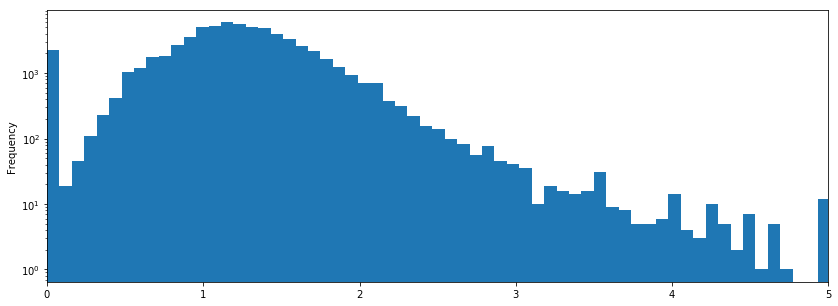

In [31]:
user_features.groupby('user_id')['rating'].std().plot(
    kind = 'hist', xlim = (0, 5), bins = 80, logy = True, xticks = np.arange(6), figsize = (14, 5))

Last but not least, I want to look at the distribution of the number of ratings each user has. Specifically, I am interested in the extreme cold-start users (with 3 or less ratings) and cold-start users (with 4 to 9 ratings). I will first draw the histogram to check for irregularities, but I don't expect there to be much of it.

In [33]:
rating_counts = user_features.groupby('user_id')['rating'].count()
rating_counts.describe()

count    69600.000000
mean        91.052313
std        135.764253
min          1.000000
25%         13.000000
50%         45.000000
75%        114.000000
max       3747.000000
Name: rating, dtype: float64

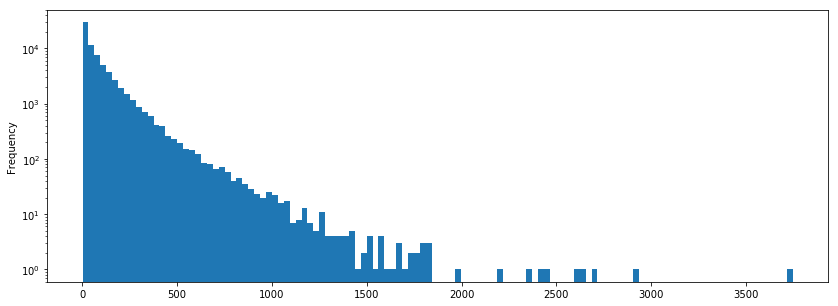

In [49]:
rating_counts.plot(
    kind = 'hist', bins = 120, logy = True, figsize = (14, 5))

As expected, there is an exponential (as a matter of fact, a double exponential, as it is still visible after the log operation on y axis), decrease in the number of ratings, so the results are as expected.

In [52]:
print('Extreme cold start: ', rating_counts[rating_counts < 4].count() / rating_counts.count())
print('Cold start: ', rating_counts.loc[(rating_counts[rating_counts < 10] &  rating_counts[rating_counts > 3])].count() / rating_counts.count())

Extreme cold start:  0.102255747126
Cold start:  0.0507471264368


These results are, also expected. 10% of our population is extreme cold start users, and many of those are probably people who came and realized that they had no need for this site. Some of them will be the actual users we are targeting. For this reason, it would actually be beneficial to have the timestamp of when an item was rated, or even, the last time a user was online. These information would allow us to weed out such inactive persons (who are not the actual audience for this site anyway) fairly easily. Instead, we can look at the ratio of the ratings done by these users and how much information would we lose by not using those users for training.

In [54]:
rating_counts[rating_counts < 4].sum() / rating_counts.sum()

0.0020131789212371755

Only .2 percent of the ratings will be lost. I expect that the pros will outweight the cons of removing those users, and in the future, I will try my methods while both removing and keeping those to test this hypothesis. This concludes my preliminary analysis, and you can go on to the next notebook :)